In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
## drop days, momths and year 
df.drop(['day' , 'month' , 'year'] , axis = 1 , inplace = True )

In [6]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [7]:
df['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [8]:
## Encoding 

df['Classes'] = np.where(df['Classes'].str.contains('not fire') , 0 , 1 )

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
## Independent And dependent features
X = df.drop('FWI' , axis = 1 )
y = df['FWI']

In [11]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [12]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [13]:
## Train test split 
from sklearn.model_selection import train_test_split

In [14]:
X_train , X_test , y_train , y_test = train_test_split( X , y, test_size=0.33, random_state=42 )

In [15]:
X_train.shape

(162, 11)

In [16]:
X_test.shape 

(81, 11)

## Feature Selection 

<AxesSubplot: >

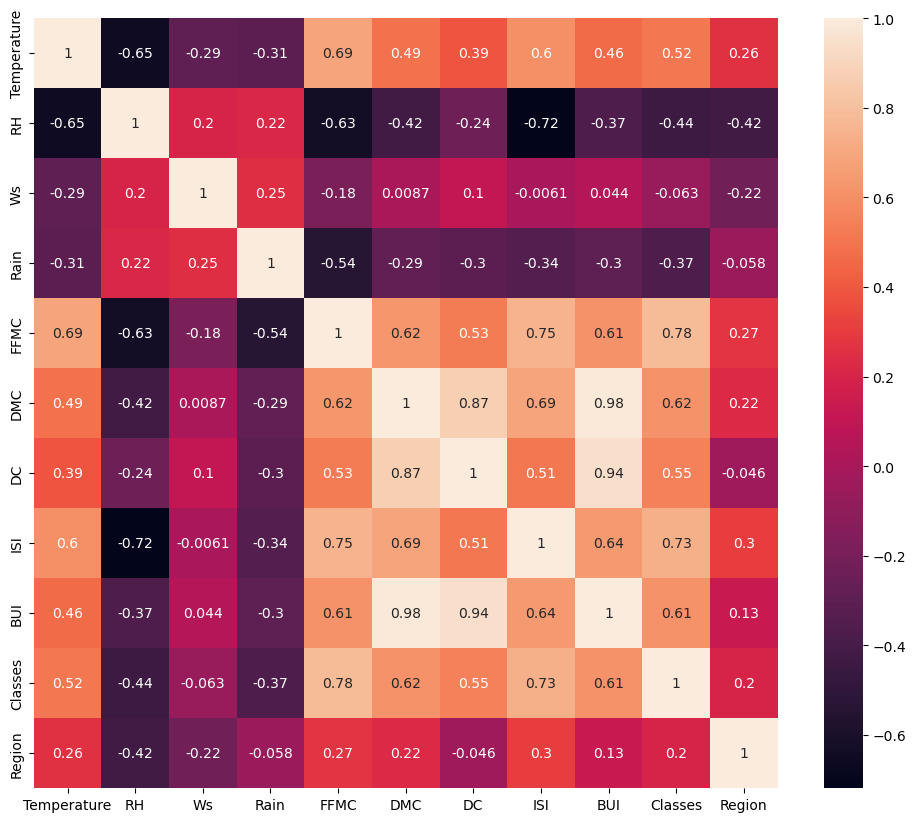

In [17]:
## Check for multicollinearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [18]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr
            
            

In [19]:
## threshold--Domain expertise
corr_features=correlation(X_train,0.85)

In [20]:
corr_features 

{'BUI', 'DC'}

In [21]:
## drop feature when correlation is more than 0.85 
X_train.drop(corr_features , axis = 1 , inplace = True)
X_test.drop(corr_features , axis = 1 , inplace = True)
X_train.shape , X_test.shape

((162, 9), (81, 9))

In [24]:
## Feature Selection and Feature Scaling 

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train_Scaled = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

# Box Plots To understand Effect Of Standard Scaler

/tmp/ipykernel_556/2233409036.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train After Scaling')

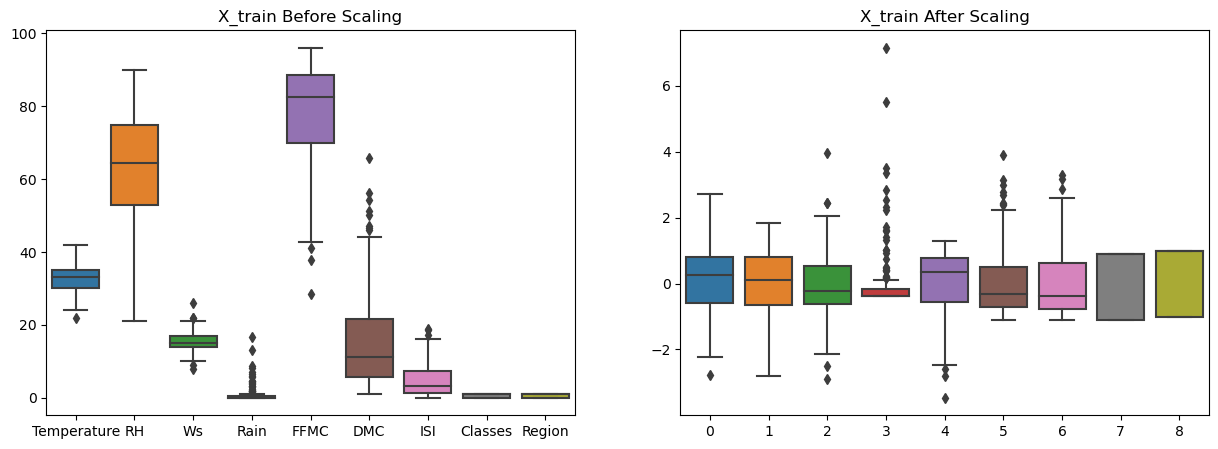

In [30]:
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data = X_train_Scaled)
plt.title('X_train After Scaling')

# Linear Regression Model

In [31]:
 from sklearn.linear_model import LinearRegression

In [34]:
## make a object of linearRegression 
linreg = LinearRegression()
linreg.fit(X_train_Scaled , y_train)
y_pred = linreg.predict(X_test_Scaled)

In [37]:
y_pred

array([ 8.22824619,  7.78215852, -0.25828998,  4.38055759,  6.68222943,
        1.3622597 ,  1.99945794,  7.8355231 ,  1.75018462,  3.38281514,
        0.39430907,  9.77499654,  9.34088351, 17.0031456 , 18.46405093,
        1.27800873,  1.96842081, -0.13276177,  7.16594485,  3.0815781 ,
        1.40741562,  0.18075746,  6.61692105,  0.30350512, 21.01326642,
        5.12525044,  5.95195917,  9.79455912, -0.10781944,  9.74431038,
        6.59526666, -0.41271825, 10.37821088, 14.54681696,  1.534249  ,
        0.44968093,  2.03021843,  6.11533999, -0.58567088, -0.50816843,
        6.70967918,  1.89400102,  8.65548055, -0.39939666, 15.42446579,
        8.30696806,  8.17037058,  1.429858  , 12.91587627,  1.21897904,
       29.50229226,  5.57023   , 17.21300934, 19.44599949, 13.78147012,
       16.16976915,  0.66101829,  8.98278392,  3.59370818, 14.64105141,
        5.14896687,  0.79459158, -0.54252859, 21.87012705,  3.25163001,
        1.75067189,  9.70047411,  6.92953233, 10.47866997, -0.37

In [36]:
## Check MSE and R2 Score 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5767877823415978
R2 Score 0.9845563190792226


# Lasso Regression

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_Scaled , y_train)
y_pred = linreg.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5767877823415978
R2 Score 0.9845563190792226


# Ridge Regression model

In [40]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(X_train_Scaled,y_train)
y_pred=ridge.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5953582907340912
R2 Score 0.9839564989246832


# Elasticnet Regression

In [42]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(X_train_Scaled,y_train)
y_pred=elastic.predict(X_test_Scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.834545337587552
R2 Score 0.8825431896054333


In [43]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))